# Load data from csv files

In [3]:
import pandas as pd

samples = pd.read_excel('all_training_data.xlsx')
print(samples.columns)

Index(['system:index', 'BurnDate', 'Month', 'Precip', 'FirstDay', 'LastDay',
       'QA', 'Uncertainty', 'elevation', 'fnf', 'gHM', 'Fpar', 'FparExtra_QC',
       'FparLai_QC', 'FparStdDev', 'Lai', 'LaiStdDev', 'apr', 'aug', 'dec',
       'feb', 'jan', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sep', 'b1',
       'ppt', 'tdmean', 'tmax', 'tmean', 'tmin', 'vpdmax', 'vpdmin'],
      dtype='object')


In [104]:
samples_prune = samples.copy()

In [105]:
y = samples_prune['Uncertainty'].values.tolist()

# Prune the unuseful columns
del samples_prune['system:index'] # Unnecessary
del samples_prune['BurnDate'] # Unnecessary
del samples_prune['Month'] # 
del samples_prune['Precip'] # 
del samples_prune['FirstDay'] # Unnecessary
del samples_prune['LastDay'] # Unnecessary
del samples_prune['QA'] # Unnecessary
del samples_prune['Uncertainty'] # Unnecessary

del samples_prune['elevation'] # No contribution
del samples_prune['fnf'] # No contribution
del samples_prune['gHM'] # Degrade

#del samples_prune['Fpar']
#del samples_prune['FparExtra_QC']
del samples_prune['FparLai_QC'] # No contribution
#del samples_prune['FparStdDev']
#del samples_prune['Lai']
del samples_prune['LaiStdDev'] # No contribution

del samples_prune['apr']
del samples_prune['aug']
del samples_prune['dec']
del samples_prune['feb']
del samples_prune['jan']
del samples_prune['jul']
del samples_prune['jun']
del samples_prune['mar']
del samples_prune['may']
del samples_prune['nov']
del samples_prune['oct']
del samples_prune['sep']

#del samples_prune['b1']
del samples_prune['ppt']   # Degrade
#del samples_prune['tdmean']
#del samples_prune['tmax']
#del samples_prune['tmean']
del samples_prune['tmin']   # Degrade

#del samples_prune['vpdmax']
#del samples_prune['vpdmin']

X = samples_prune.values.tolist()

In [106]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data Normalization

In [10]:
from sklearn.preprocessing import StandardScaler

In [107]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
#print(y_train)
#print(y_test)

# ANN Training

In [12]:
# https://www.springboard.com/blog/beginners-guide-neural-network-in-python-scikit-learn-0-18/
# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw
from sklearn.neural_network import MLPClassifier
import numpy as np

In [108]:
mlp = MLPClassifier(hidden_layer_sizes=(17),solver='lbfgs',activation='logistic',random_state=800,early_stopping=True,max_iter=1000)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
np.mean(y_pred == y_test)

0.4225352112676056

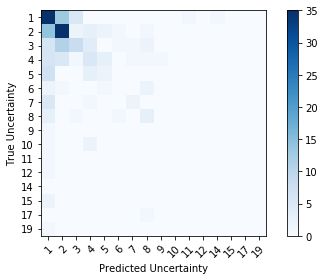

In [109]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels

cm = confusion_matrix(y_test, y_pred)

# Only uses the labels that appear in the data
labels = unique_labels(y_test, y_pred)
#print(cm)

fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=labels, yticklabels=labels,
           ylabel='True Uncertainty',
           xlabel='Predicted Uncertainty')
# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
fig.tight_layout()